# Introduction

In this project we will analyze housing data for the city of Ames, Iowa and try to predict the sale price of houses based on some features. We will first clean the data, transform some of the features, and then select the relevant features for Linear Regression.

Information about the dataset can be found @ http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

In [391]:
#load the necessary libraries and functions

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

pd.options.display.max_columns = 999 #max number of columns to display inline

# render charts inline 
%matplotlib inline 

In [392]:
#load the tab delimited data into a dataframe
housing = pd.read_csv('AmesHousing.tsv', delimiter = '\t')
housing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


# Data Cleaning and Feature Engineering

Our strategy for data cleaning will be as follows:
1. Remove all numeric columns with more than 5% of the values missing
2. For the remaining numeric columns with missing values, impute the missing values with the mode
3. If any text column has a missing value, remove them for now

In [393]:
#check for missing values in the data
missing_values = housing.isnull().sum()
missing_values

Order                0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       490
Lot Area             0
Street               0
Alley             2732
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        23
Mas Vnr Area        23
Exter Qual           0
Exter Cond           0
                  ... 
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual

Looks like there are several columns with missing values and some columns have lots of missing values. We will need to drop columns with a lot of missing values. Lets set the threshold for this to be 5%.

In [394]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

In [395]:
#Identify columns that need to dropped because they have more than 5% missing values 
drop_cols = housing.columns[(housing.isnull().sum()/housing.shape[0])>0.05]

In [396]:
housing = housing.drop(columns = drop_cols, axis = 1) #drop these identified columns

In [397]:
housing.isnull().sum() #quick peek at how the data looks now

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Area            0
Street              0
Lot Shape           0
Land Contour        0
Utilities           0
Lot Config          0
Land Slope          0
Neighborhood        0
Condition 1         0
Condition 2         0
Bldg Type           0
House Style         0
Overall Qual        0
Overall Cond        0
Year Built          0
Year Remod/Add      0
Roof Style          0
Roof Matl           0
Exterior 1st        0
Exterior 2nd        0
Mas Vnr Type       23
Mas Vnr Area       23
Exter Qual          0
Exter Cond          0
Foundation          0
Bsmt Qual          80
                   ..
Electrical          1
1st Flr SF          0
2nd Flr SF          0
Low Qual Fin SF     0
Gr Liv Area         0
Bsmt Full Bath      2
Bsmt Half Bath      2
Full Bath           0
Half Bath           0
Bedroom AbvGr       0
Kitchen AbvGr       0
Kitchen Qual        0
TotRms AbvGrd       0
Functional          0
Fireplaces

In [398]:
#identify numeric columns with missing values
num_cols = housing.select_dtypes(include = ['int','float']).columns
fix_num_cols = num_cols[(housing.select_dtypes(include = ['int','float']).isnull().sum()>0)]

In [399]:
#lets impute the missing values with the mode for that column. So, lets calulate the mode for these columns
imputed_vals = housing[fix_num_cols].mode().to_dict(orient='records')[0]
imputed_vals

{'Mas Vnr Area': 0.0,
 'BsmtFin SF 1': 0.0,
 'BsmtFin SF 2': 0.0,
 'Bsmt Unf SF': 0.0,
 'Total Bsmt SF': 0.0,
 'Bsmt Full Bath': 0.0,
 'Bsmt Half Bath': 0.0,
 'Garage Cars': 2.0,
 'Garage Area': 0.0}

In [400]:
housing = housing.fillna(imputed_vals) #impute with the modes
housing[num_cols].isnull().sum().value_counts() #lets verify if now the number of missing values = 0, which it should

0    37
dtype: int64

In [401]:
#identify all the text columns with missing values  
text_cols = housing.select_dtypes(include = ['object'])
fix_text_cols = text_cols.columns[text_cols.isnull().sum()>0]
fix_text_cols

Index(['Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Electrical'],
      dtype='object')

In [402]:
housing = housing.drop(columns = fix_text_cols, axis = 1)#drop these columns for now

In [403]:
housing.isnull().sum().value_counts()

0    64
dtype: int64

After studying the the description of the data, we can actually combine some features that could help our model perform better. Lets use the years that each house was built ('Year Built') and sold ('Yr Sold') to compute the age of the house. Also, lets use the years that the house of sold ('Yr Sold') and remoded ('Year Remod/Add') to compute the number of years since remod.

In [404]:
#Create the two new features 'age_sold' and 'age_remod'
housing['age_sold'] = housing['Yr Sold'] - housing['Year Built']
housing['age_remod'] = housing['Yr Sold'] - housing['Year Remod/Add']
housing['age_sold'].value_counts().sort_index()

-1        1
 0      116
 1      218
 2       90
 3       60
 4       76
 5       66
 6       66
 7       51
 8       44
 9       50
 10      40
 11      47
 12      33
 13      38
 14      27
 15      31
 16      22
 17      25
 18      14
 19      16
 20       9
 21       9
 22      12
 23      12
 24       8
 25      11
 26      17
 27       9
 28      19
       ... 
 97      11
 98      10
 99      13
 100      5
 101      1
 102      1
 103      3
 104      1
 106     10
 107      5
 108      7
 109      5
 110      5
 111      1
 112      2
 113      1
 114      2
 115      1
 117      3
 118      2
 119      2
 120      1
 122      1
 125      1
 126      1
 127      2
 128      2
 129      2
 135      1
 136      1
Name: age_sold, Length: 128, dtype: int64

In [405]:
housing['age_remod'].value_counts().sort_index()

-2       1
-1       2
 0     238
 1     193
 2     104
 3      97
 4     111
 5      91
 6      83
 7      75
 8      85
 9      71
 10     66
 11     62
 12     59
 13     57
 14     46
 15     37
 16     38
 17     33
 18     18
 19     21
 20     18
 21     15
 22     13
 23     18
 24     10
 25     14
 26     17
 27     18
      ... 
 31     50
 32     37
 33     29
 34     30
 35     22
 36     37
 37     30
 38     27
 39     47
 40     30
 41     26
 42     33
 43     27
 44     34
 45     22
 46     25
 47     28
 48     26
 49     27
 50     23
 51     31
 52     29
 53     30
 54     21
 55     23
 56    112
 57     79
 58     76
 59     78
 60     42
Name: age_remod, Length: 63, dtype: int64

There are a few negative values that don't make sense. Lets remove them.

In [406]:
#drop rows with negative values in the newly created columns
housing = housing.drop(housing[housing['age_remod'] < 0].index, axis = 0)
housing = housing.drop(housing[housing['age_sold'] < 0].index, axis = 0)

We need to drop columns that do not add any value for the learning algorithm. Informationa about all the columns can be found @ http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

In [407]:
#we don't need 'PID' and 'Order' since they contain identification values of the houses
#lets drop "Mo Sold", "Sale Condition", "Sale Type", "Yr Sold","Year Built", and "Year Remod/Add" since they will add no value for further analysis
housing = housing.drop(["Year Built", "Year Remod/Add"], axis = 1)
housing = housing.drop(["PID", "Order"], axis=1)
housing = housing.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)

Lets examine how well the numeric features are correlated with the target column - 'SalePrice'

In [408]:
corrs = housing.select_dtypes(include=['int','float']).corr()['SalePrice'] #calculate Pearson's correlation coefficients for the numeric features with 'SalePrice'

In [409]:
corrs = corrs.abs().sort_values(ascending = False)
corrs

SalePrice          1.000000
Overall Qual       0.801206
Gr Liv Area        0.717596
Garage Cars        0.648361
Total Bsmt SF      0.644012
Garage Area        0.641425
1st Flr SF         0.635185
age_sold           0.558979
Full Bath          0.546118
age_remod          0.534985
Mas Vnr Area       0.506983
TotRms AbvGrd      0.498574
Fireplaces         0.474831
BsmtFin SF 1       0.439284
Wood Deck SF       0.328183
Open Porch SF      0.316262
Half Bath          0.284871
Bsmt Full Bath     0.276258
2nd Flr SF         0.269601
Lot Area           0.267520
Bsmt Unf SF        0.182751
Bedroom AbvGr      0.143916
Enclosed Porch     0.128685
Kitchen AbvGr      0.119760
Screen Porch       0.112280
Overall Cond       0.101540
MS SubClass        0.085128
Pool Area          0.068438
Low Qual Fin SF    0.037629
Bsmt Half Bath     0.035875
3Ssn Porch         0.032268
Misc Val           0.019273
BsmtFin SF 2       0.006127
Name: SalePrice, dtype: float64

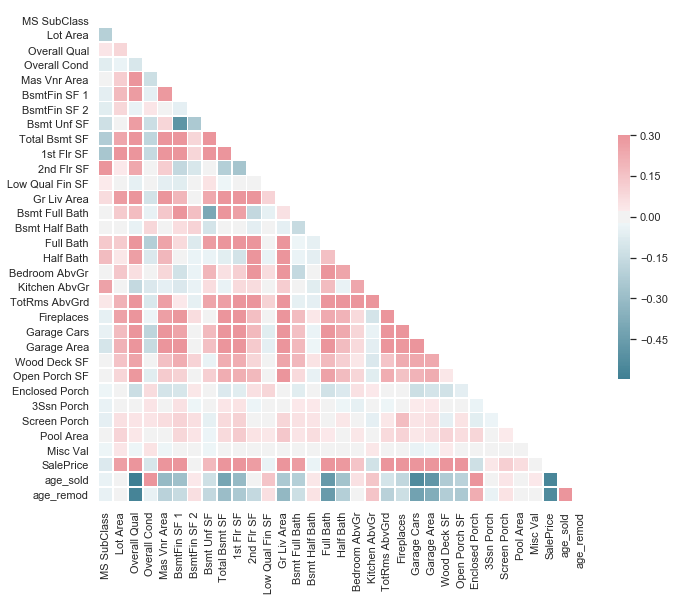

In [410]:
import seaborn as sns

corrs_all = housing.select_dtypes(include=['int','float']).corr() 

#Following code is to plot a diagonal pairwise correlation matrix. Taken from https://seaborn.pydata.org/examples/many_pairwise_correlations.html 
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corrs_all, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrs_all, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Lets drop features that have a weak correlation (absolute value less than 0.5) with 'SalePrice'

In [411]:
housing = housing.drop(corrs[corrs <0.5].index, axis = 1) #drop the weakly correlated features

Numeric columns are good but we still need the text columns for our analysis. So what do we do with them? We first need to identify the text columns that need to be converted to the 'categorical' data type in Python. We need to convert them to the 'categorical' data type because then we can create dummy variables for them (aka one-hot encoding) and use those values for our learning model.

In [412]:
#identify columns that could be made 'categorical'
nominal_cols = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

#check which of those columns have we still retained in our 'housing' dataframe
retained_cols = []
for col in nominal_cols:
    if col in housing.columns:
        retained_cols.append(col)

retained_cols

['MS Zoning',
 'Street',
 'Land Contour',
 'Lot Config',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Foundation',
 'Heating',
 'Central Air']

Our strategy for these columns will be as follows:
    1. Check the number of distinct values in each of these columns
    2. Drop columns with more than a certain number of distinct values (lets pick 10 for now). We need to do this 
       step because otherwise we will end up creating a large number of dummy columns in our dataframe
    3. Convert the remaining columns to the 'categorical' type
    4. Create dummy columns for these categorical columns

In [413]:
#Lets find out how many distinct values, each of these columns have
unique_value_dict = {}
for col in retained_cols:
    unique_value_dict[col] = housing[col].value_counts().shape[0]

unique_value_dict

{'MS Zoning': 7,
 'Street': 2,
 'Land Contour': 4,
 'Lot Config': 5,
 'Neighborhood': 28,
 'Condition 1': 9,
 'Condition 2': 8,
 'Bldg Type': 5,
 'House Style': 8,
 'Roof Style': 6,
 'Roof Matl': 8,
 'Exterior 1st': 16,
 'Exterior 2nd': 17,
 'Foundation': 6,
 'Heating': 6,
 'Central Air': 2}

In [414]:
#identify columns with more than 10 distinct values
non_diverse_cols = []
for k,v in unique_value_dict.items():
    if v < 10:
        non_diverse_cols.append(k)

non_diverse_cols

['MS Zoning',
 'Street',
 'Land Contour',
 'Lot Config',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Foundation',
 'Heating',
 'Central Air']

In [415]:
#drop columns with more than 10 distinct values
housing = housing.drop(non_diverse_cols, axis = 1)
txt_cols = housing.select_dtypes(include = ['object'])

#convert the remaining columns to the 'categorical' type and then create dummy columns for them
for col in txt_cols.columns:
    housing[col] = housing[col].astype('category')
dummy_cols = pd.get_dummies(housing.select_dtypes(include = ['category']))
housing = pd.concat([housing, dummy_cols],axis = 1)
housing = housing.drop(txt_cols.columns, axis = 1)


In [416]:
housing.head(10)

,Overall Qual,Mas Vnr Area,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,Garage Cars,Garage Area,SalePrice,age_sold,age_remod,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Utilities_AllPub,Utilities_NoSeWa,Utilities_NoSewr,Land Slope_Gtl,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Exter Qual_Ex,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Ex,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Heating QC_Ex,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Kitchen Qual_Ex,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Paved Drive_N,Paved Drive_P,Paved Drive_Y
0,6,112.0,1080.0,1656,1656,1,2.0,528.0,215000,50,50,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
1,5,0.0,882.0,896,896,1,1.0,730.0,105000,49,49,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
2,6,108.0,1329.0,1329,1329,1,1.0,312.0,172000,52,52,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
3,7,0.0,2110.0,2110,2110,2,2.0,522.0,244000,42,42,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,5,0.0,928.0,928,1629,2,2.0,482.0,189900,13,12,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
5,6,20.0,926.0,926,1604,2,2.0,470.0,195500,12,12,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
6,8,0.0,1338.0,1338,1338,2,2.0,582.0,213500,9,9,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
7,8,0.0,1280.0,1280,1280,2,2.0,506.0,191500,18,18,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
8,8,0.

# Train and Evaluate the Linear Regression Model

In [417]:
train_set = housing.drop(['SalePrice'], axis = 1) #drop the target column from the training set to just extract the features

In [418]:
#Create a function to perform linear regression with k-fold cross validation
def train_and_test(df_train,labels,k):
    
    lr = LinearRegression()
    scores = cross_val_score(lr,df_train,labels, scoring = 'neg_mean_squared_error', cv = k)
    
    return (np.sqrt(-scores))

In [419]:
#call the function with a 10-fold cross validation and check the root mean squared errors (rmses) from the cross validation
rmses = train_and_test(train_set, housing['SalePrice'], k = 10)
rmses

array([26869.39199282, 31513.54507997, 24568.68018125, 29592.59487184,
       25282.60495034, 44204.06416314, 31357.46620032, 29134.61603042,
       27798.41509268, 25787.97215976])

In [420]:
mean_rmse = np.mean(rmses) #compute the mean rmse
mean_rmse

29610.935072254466

In [421]:
std_rmse = np.std(rmses) #compute the standard deviation of the rmses
std_rmse

5379.888821080618

In [422]:
#lets see what the mean, min, and max sale prices are for a house in the dataset
housing['SalePrice'].describe()

count      2927.000000
mean     180766.566450
std       79914.124173
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [423]:
# our mean rmse doesn't seem that bad but can we do better? Lets try the Gradient Boosted Regression Tree model with a tree depth of 3, 100 trees, and learning rate of 0.2

from sklearn.ensemble import GradientBoostingRegressor

train = train_set[:int(len(train_set)*0.7)]
labels_train = housing['SalePrice'][:int(len(housing)*0.7)]
test = train_set[int(len(train_set)*0.7):]
labels_test = housing['SalePrice'][int(len(housing)*0.7):]
gbrt = GradientBoostingRegressor(max_depth = 3, n_estimators = 100, learning_rate = 0.2)
gbrt.fit(train, labels_train)
predictions = gbrt.predict(train)
rmse_train = mean_squared_error(labels_train, predictions)**0.5
predictions = gbrt.predict(test)
rmse_test = mean_squared_error(labels_test, predictions)**0.5

In [424]:
print(rmse_train, rmse_test)

16311.235813550773 24373.16741356876


The Gradient Boosted Regression Tree Model gives us an RMSE that is better by almost 5000!! But is it work the extra computational cost coming from training 100 trees especially if the dataset is very large? Probably not.

Great, so we have successfully trained a linear regression model to predict house prices.